ファイルのパスを入力"D:\Users\Matsuda\MMD\openpose-build\x64\examples\卒業研究実験\実験用動画\data\4m;5.52m\4m5.52m_000000000002_keypoints.json"
4
No1またはNo2No2


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


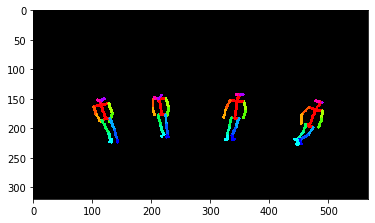

In [3]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# jsonのロード
file_path=input("ファイルのパスを入力").strip("\"")
with open(file_path, 'r') as f:
    data = json.load(f)
    #人数を出力
    print(len(data['people']))
#動画のサイズを読み込む
size={"No1":(2160,3840,16),"No2":(320,568,4)}
d_number=input("No1またはNo2")
length=size[d_number][0]
width=size[d_number][1]
line_thickness=size[d_number][2]
#黒背景画像の用意
img = np.zeros(shape=(length,width,3),dtype=np.int16)
# 関節毎の描画色
colors = [(255.,     0.,    85.), (255.,     0.,     0.), (255.,    85.,     0.), 
          (255.,   170.,     0.), (255.,   255.,     0.), (170.,   255.,     0.), 
          (85.,   255.,     0.), (0.,   255.,     0.), (255.,   0.,    0.), 
          (0.,   255.,   85.), (0.,   255.,   170.), (0.,   255.,   255.), 
          (0.,    170.,   255.), (0.,     85.,   255.), (0.,     0.,   255.), 
          (255.,     0.,   170.), (170.,     0.,   255.), (255.,     0.,   255.),
          (85.,0.,255.),(0.,0.,255.),(0.,0.,255.),(0.,0.,255.),
          (0.,255.,255.),(0.,255.,255.),(0.,255.,255.)]
#関節ごとの組み合わせ
pairs=[(1,8),(1,2),(1,5), 
       (2,3),(3,4),(5,6), 
       (6,7),(8,9),(9,10), 
       (10,11),(8,12), (12,13), 
       (13,14),(1,0),(0,15), 
       (15,17),(0,16), (16,18), 
       (14,19),(19,20),(14,21), 
       (11,22),(22,23),(11,24)]
# 検出された全員について
for d in data['people']:
     kpt = np.array(d['pose_keypoints_2d']).reshape((25, 3))
    #*すべての関節の組み合わせに対しループ
     for p in pairs:
         pt1 = tuple(list(map(int, kpt[p[0], 0:2])))
         c1 = kpt[p[0], 2]
         pt2 = tuple(list(map(int, kpt[p[1], 0:2])))
         c2 = kpt[p[1], 2]
         #信頼度0.0の関節は無視
         if c1 == 0.0 or c2 == 0.0:
             continue
         # 関節の描画
         color = tuple(list(map(int, colors[p[0]])))
         img = cv2.line(img, pt1, pt2, color,line_thickness)
plt.imshow(img)  